In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_and_save_asc(asc_file_path, csv_file_path):
    # Lire le fichier .ASC
    data = []
    with open(asc_file_path, 'r') as file:
        for line in file:
            # Supposons que les valeurs sont séparées par des espaces
            values = line.strip().split()
            data.append(values)
    
    # Convertir les données en DataFrame
    df = pd.DataFrame(data)
    
    # Couper les trois premières colonnes
    df = df.iloc[:, 3:]
    
    # Renommer les colonnes
    df.columns = ['temps', 'amplitude']
    
    # Sauvegarder en CSV
    df.to_csv(csv_file_path, index=False)
    print(f'Le fichier CSV a été sauvegardé sous {csv_file_path}')
    
    return df
    
def find_intervals(df):
    intervals = []
    start_index = 0
    for i in range(1, len(df)):
        if df['temps'].iloc[i] < df['temps'].iloc[i - 1]:
            intervals.append([start_index, i])
            start_index = i
    intervals.append([start_index, len(df)])
    print(intervals)
    return intervals


def create_segments(df, intervals):
    segments = [df.iloc[start_idx:end_idx] for start_idx, end_idx in intervals]
    print(f"Nombre de segments: {len(segments)}")
    for idx, segment in enumerate(segments):
        print(f"Segment {idx + 1}:\n{segment}\n")
    return segments

def calculate_intervals_and_counts(segments):
    time_intervals = []
    line_counts = []
    for segment in segments:
        start_time = float(segment['temps'].iloc[0])
        end_time = float(segment['temps'].iloc[-1])
        interval = end_time - start_time
        line_count = len(segment)
        time_intervals.append(interval)
        line_counts.append(line_count)
    
    for i, (interval, count) in enumerate(zip(time_intervals, line_counts)):
        print(f"Segment {i + 1}: Intervalle de temps = {interval:.6f} secondes, Nombre de lignes = {count}")
    
    total_intervals = len(time_intervals)
    total_lines = sum(line_counts)
    print(f"Total des segments : {total_intervals}, Total des lignes : {total_lines}")
    return time_intervals, line_counts


def generate_amplitude_matrix(segments):
    num_points = len(segments)
    num_time_instances = max(len(segment) for segment in segments)
    amplitude_matrix = np.zeros((num_time_instances, num_points))
    for i, segment in enumerate(segments):
        for j in range(len(segment)):
            amplitude_matrix[j, i] = float(segment['amplitude'].iloc[j])
    time_values = [float(time) for time in segments[0]['temps']]
    amplitude_df = pd.DataFrame(amplitude_matrix, columns=[f'Point {i+1}' for i in range(num_points)], index=[f'{time:.6f}' for time in time_values])
    return amplitude_df



In [3]:
asc_file_path = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\4e essai-grand bac et grand tuyau\Limon-grand tuyau-placé à 5cm du fond.ASC"
csv_file_path=r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\4e essai-grand bac et grand tuyau\Limon-grand tuyau-placé à 5cm du fond.csv"
df = read_and_save_asc(asc_file_path, csv_file_path)


Le fichier CSV a été sauvegardé sous C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\4e essai-grand bac et grand tuyau\Limon-grand tuyau-placé à 5cm du fond.csv


In [5]:
df

,temps,amplitude
0,0.000000,1693.000000
1,0.000610,696.000000
2,0.001221,901.000000
3,0.001831,992.000000
4,0.002441,1028.000000
...,...,...
352251,4.996948,932.000000
352252,4.997559,942.000000
352253,4.998169,940.000000
352254,4.998779,943.000000


In [7]:
intervals = find_intervals(df)


[[0, 8192], [8192, 16384], [16384, 24576], [24576, 32768], [32768, 40960], [40960, 49152], [49152, 57344], [57344, 65536], [65536, 73728], [73728, 81920], [81920, 90112], [90112, 98304], [98304, 106496], [106496, 114688], [114688, 122880], [122880, 131072], [131072, 139264], [139264, 147456], [147456, 155648], [155648, 163840], [163840, 172032], [172032, 180224], [180224, 188416], [188416, 196608], [196608, 204800], [204800, 212992], [212992, 221184], [221184, 229376], [229376, 237568], [237568, 245760], [245760, 253952], [253952, 262144], [262144, 270336], [270336, 278528], [278528, 286720], [286720, 294912], [294912, 303104], [303104, 311296], [311296, 319488], [319488, 327680], [327680, 335872], [335872, 344064], [344064, 352256]]


In [9]:
segments = create_segments(df, intervals)


Nombre de segments: 43
Segment 1:
         temps    amplitude
0     0.000000  1693.000000
1     0.000610   696.000000
2     0.001221   901.000000
3     0.001831   992.000000
4     0.002441  1028.000000
...        ...          ...
8187  4.996948   980.000000
8188  4.997559   978.000000
8189  4.998169   978.000000
8190  4.998779   980.000000
8191  4.999390   980.000000

[8192 rows x 2 columns]

Segment 2:
          temps    amplitude
8192   0.000000  1690.000000
8193   0.000610   688.000000
8194   0.001221   897.000000
8195   0.001831   984.000000
8196   0.002441  1023.000000
...         ...          ...
16379  4.996948   994.000000
16380  4.997559   986.000000
16381  4.998169   989.000000
16382  4.998779   987.000000
16383  4.999390   987.000000

[8192 rows x 2 columns]

Segment 3:
          temps    amplitude
16384  0.000000  1684.000000
16385  0.000610   680.000000
16386  0.001221   888.000000
16387  0.001831   983.000000
16388  0.002441  1020.000000
...         ...          ...
24571

In [11]:
def generate_amplitude_matrix(segments):
    num_points = len(segments)
    num_time_instances = max(len(segment) for segment in segments)
    amplitude_matrix = np.zeros((num_time_instances, num_points))
    for i, segment in enumerate(segments):
        for j in range(len(segment)):
            amplitude_matrix[j, i] = float(segment['amplitude'].iloc[j])
    time_values = [float(time) for time in segments[0]['temps']]
    amplitude_df = pd.DataFrame(amplitude_matrix, columns=[f'Point {i+1}' for i in range(num_points)], index=[f'{time:.6f}' for time in time_values])
    return amplitude_df


In [13]:
amplitude_df = generate_amplitude_matrix(segments)

In [17]:
amplitude_df

,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,...,Point 34,Point 35,Point 36,Point 37,Point 38,Point 39,Point 40,Point 41,Point 42,Point 43
0.000000,1693.0,1690.0,1684.0,1693.0,1679.0,1673.0,1683.0,1686.0,1686.0,1689.0,...,1693.0,1680.0,1693.0,1684.0,1691.0,1689.0,1686.0,1677.0,1681.0,1687.0
0.000610,696.0,688.0,680.0,673.0,676.0,683.0,691.0,679.0,682.0,684.0,...,699.0,701.0,694.0,694.0,693.0,692.0,697.0,709.0,704.0,706.0
0.001221,901.0,897.0,888.0,877.0,894.0,885.0,884.0,892.0,891.0,889.0,...,907.0,902.0,901.0,899.0,901.0,900.0,903.0,914.0,908.0,909.0
0.001831,992.0,984.0,983.0,976.0,978.0,977.0,979.0,980.0,983.0,977.0,...,1008.0,991.0,992.0,992.0,993.0,992.0,995.0,1005.0,999.0,1007.0
0.002441,1028.0,1023.0,1020.0,1013.0,1015.0,1013.0,1017.0,1016.0,1017.0,1021.0,...,1038.0,1025.0,1028.0,1029.0,1029.0,1030.0,1032.0,1041.0,1042.0,1047.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.996948,980.0,994.0,991.0,988.0,1008.0,1014.0,1016.0,1021.0,1026.0,1027.0,...,1038.0,1039.0,1027.0,1021.0,1002.0,984.0,969.0,947.0,939.0,932.0
4.997559,978.0,986.0,987.0,1005.0,1011.0,1011.0,1017.0,1018.0,1020.0,1041.0,...,1036.0,1035.0,1032.0,1022.0,1000.0,981.0,970.0,940.0,930.0,942.0
4.998169,978.0,989.0,985.0,988.0,1005.0,1010.0,1031.0,1017.0,1022.0,1032.0,...,1036.0,1042.0,1034.0,1023.0,1005.0,983.0,972.0,945.0,924.0,940.0
4.998779,980.0,987.0,989.0,999.0,991.0,1020.0,1025.0,1019.0,1026.0,1032.0,...,1039.0,1043.0,1032.0,1021.0,1011.0,985.0,970.0,941.0,934.0,943.0


In [19]:
amplitude_df.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\4e essai-grand bac et grand tuyau\Limon-grand tuyau-placé à 5cm du fond matrix.csv")

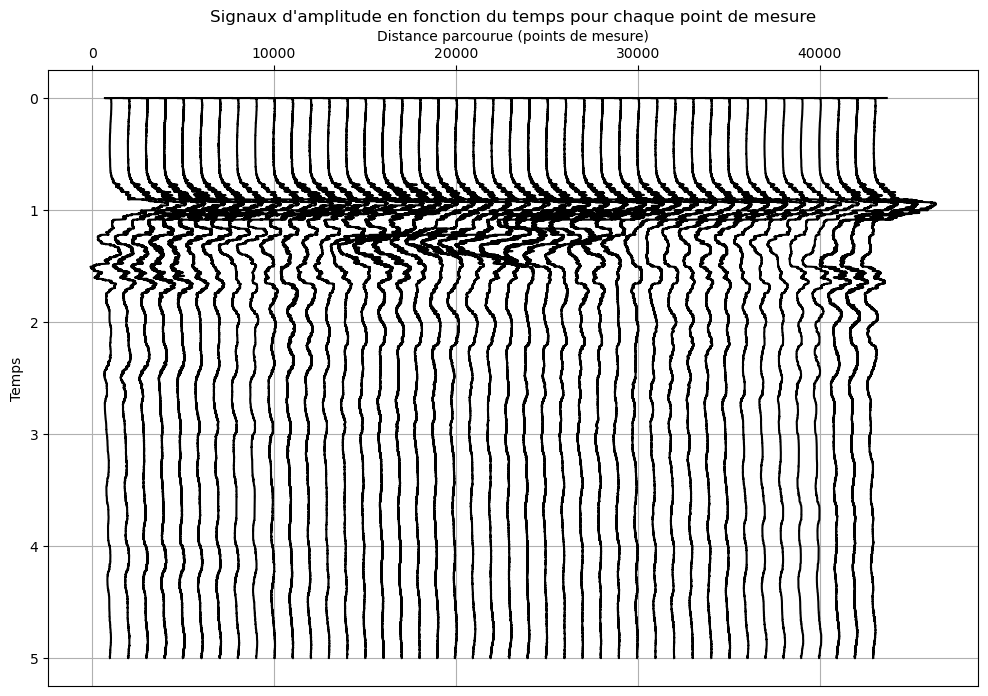

In [21]:
amplitude_matrix_path =  r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\4e essai-grand bac et grand tuyau\Limon-grand tuyau-placé à 5cm du fond matrix.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

In [23]:
def crop_amplitude_matrix(amplitude_matrix, amplitude_df):
    # Demander les paramètres de découpe à l'utilisateur
    cut_top = int(input("Entrez la valeur pour couper la partie supérieure: "))
    cut_bottom = int(input("Entrez la valeur pour couper la partie inférieure: "))
    cut_left = int(input("Entrez la valeur pour couper la partie gauche: "))
    cut_right = int(input("Entrez la valeur pour couper la partie droite: "))
    
    # Couper les parties supérieure, inférieure, droite et gauche
    amplitude_matrix_cropped = amplitude_matrix[cut_top:-cut_bottom, cut_left:-cut_right]
    index_cropped = amplitude_df.index[cut_top:-cut_bottom]  # nouveau intervalle de temps

    # Créer un nouveau DataFrame avec les valeurs découpées
    columns_cropped = amplitude_df.columns[cut_left:-cut_right]
    amplitude_df_cropped = pd.DataFrame(amplitude_matrix_cropped, columns=columns_cropped, index=index_cropped)
    
    return amplitude_matrix_cropped, index_cropped, amplitude_df_cropped

# Exécution de la fonction de prétraitement
amplitude_matrix_cropped, index_cropped, amplitude_df_cropped = crop_amplitude_matrix(amplitude_df.values, amplitude_df)



Entrez la valeur pour couper la partie supérieure:  1500
Entrez la valeur pour couper la partie inférieure:  4900
Entrez la valeur pour couper la partie gauche:  1
Entrez la valeur pour couper la partie droite:  1


In [25]:
amplitude_df_cropped.to_csv( r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\4e essai-grand bac et grand tuyau\Limon-grand tuyau-placé à 5cm du fond matrix modifiee.csv")

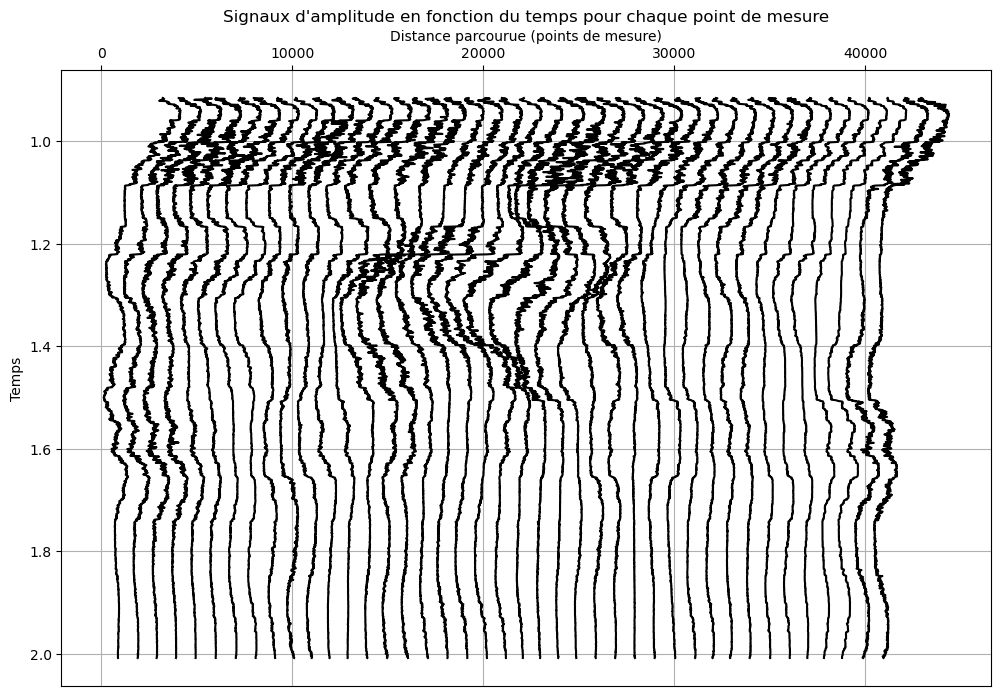

In [27]:
amplitude_matrix_path =r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\4e essai-grand bac et grand tuyau\Limon-grand tuyau-placé à 5cm du fond matrix modifiee.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()